# 1. 인공신경망의 개요

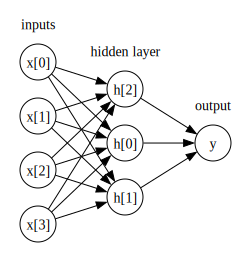

In [1]:
import mglearn

# 은닉층이 1개인 인공신경망
mglearn.plots.plot_single_hidden_layer_graph()

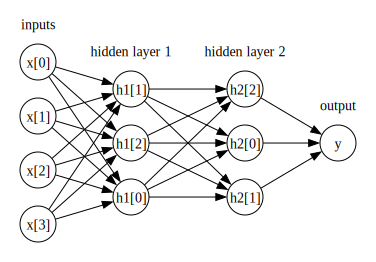

In [2]:
# 은닉층이 2개인 인공신경망
mglearn.plots.plot_two_hidden_layer_graph()


0.925


Text(0, 0.5, 'class 1')

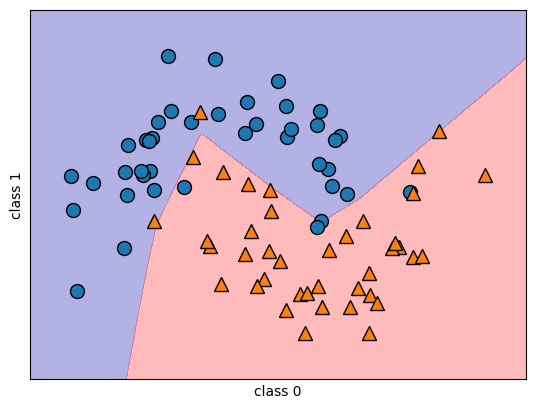

In [3]:
from sklearn.datasets import make_moons

# noise 표준편차
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

from sklearn.model_selection import train_test_split

# stratify=y : 학습용 데이터와 검증용 데이터에서 각각의 타겟값들이 동일한 비율로 나타나도록 함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

from sklearn.neural_network import MLPClassifier

# max_iter 최대 반복 횟수
model = MLPClassifier(random_state=0, max_iter=5000).fit(X_train, y_train)
# hidden_layer_sizes=(100,), 은닉층에서 사용할 유닛수의 기본값 : 100
# 데이터가 매우 적은 상태이므로 100개를 쓰는 것보다는 줄이는 것이 좋다.
# 은닉 유닛을 줄이면 모델의 복잡도는 낮아진다.

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


from matplotlib import pyplot as plt
mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel('class 0')
plt.ylabel('class 1')

0.85
0.85


Text(0, 0.5, 'class 1')

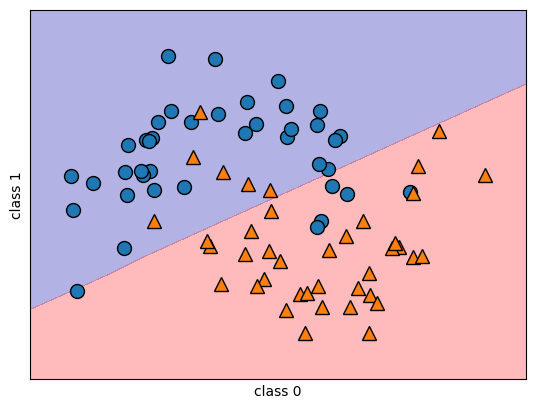

In [10]:
# 은닉유닛을 10개로 줄이고 테스트
model = MLPClassifier(random_state=0, hidden_layer_sizes=[10], max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('class 0')
plt.ylabel('class 1')

0.8375
0.85


Text(0, 0.5, 'class 1')

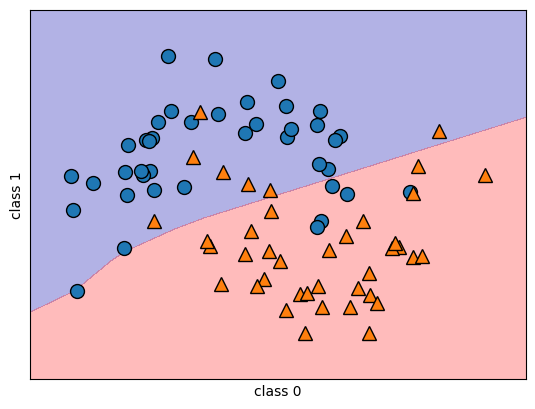

In [5]:
# 10개의 유닛으로 된 두 개의 은닉층 [10, 10]
model = MLPClassifier(random_state=0, hidden_layer_sizes=[10, 10], max_iter=500)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel('class 0')
plt.ylabel('class 1')

1.0
1.0


Text(0, 0.5, 'class 1')

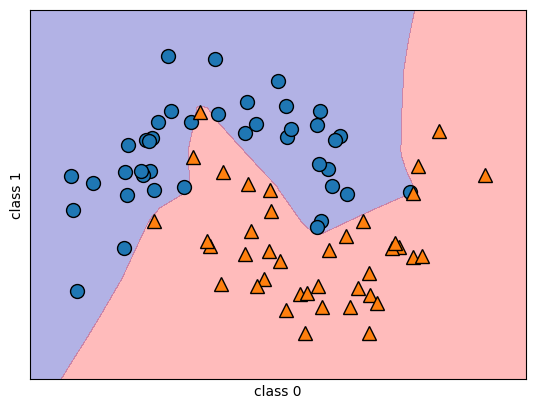

In [6]:
# 100개의 유닛으로 된 세 개의 은닉층 [100, 100, 100]
model = MLPClassifier(random_state=0, hidden_layer_sizes=[100,100,100], max_iter=500)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('class 0')
plt.ylabel('class 1')

In [12]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 7,  3],
       [ 0, 10]], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [ ]:
# 분류 classification 객관식 정확도 accuracy, roc-curve
# 회귀 regression 주관식 mse, mae, rmse, r-squared 0.0~1.0

# 2. 퍼셉트론

### AND

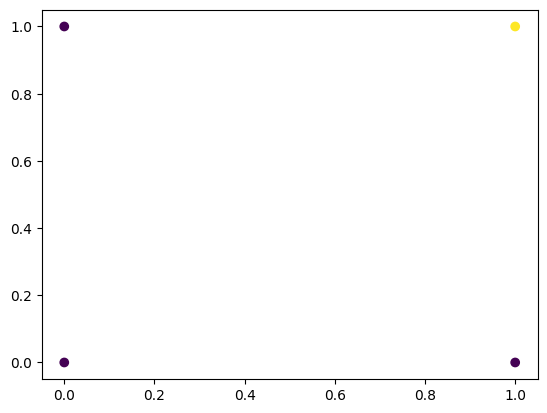

In [14]:
import matplotlib.pyplot as plt  
import numpy as np  

X=np.array([(0,0),(0,1),(1,0),(1,1)])  
y=np.array([0,0,0,1])  

plt.scatter(X[:, 0], X[:, 1], c=y)

-0.7
(0, 0)  ->  [0]
-0.19999999999999996
(1, 0)  ->  [0, 0]
-0.19999999999999996
(0, 1)  ->  [0, 0, 0]
0.30000000000000004
(1, 1)  ->  [0, 0, 0, 1]


Text(0, 0.5, 'class 1')

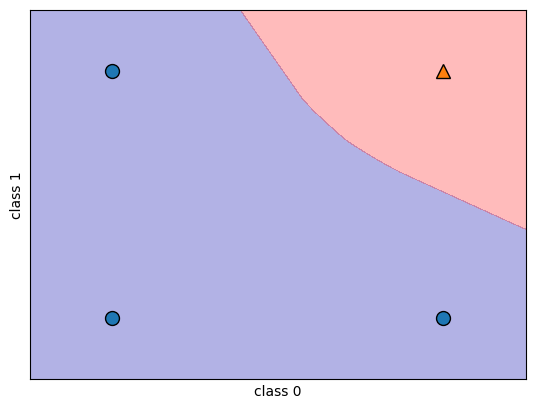

In [21]:
#######################################################

#가중치 : 각 입력 신호가 결과에 영향을 주는 중요도를 조절하는 매개변수
#편향 : 한쪽으로 치우쳐 균형을 깬다는 의미,뉴런의 활성화 정도를 조절하는 매개변수

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) #가중치
    b = -0.7 #절편(편향)

    #가중치를 곱하고 절편을 더한 값
    tmp = np.sum(w*x) + b
    
    #둘 다 0이 입력되었는데 0이 되지 않는 것은 편향값 때문
    print(tmp)

    #0보다 작으면 0, 아니면 1을 리턴
    if tmp <= 0:
        return 0
    else:
        return 1

y=[]

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y.append(AND(xs[0], xs[1]))
    print(xs , " -> " , y)
    
#######################################################

from sklearn.neural_network import MLPClassifier  
import mglearn

model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)  
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("class 0")  
plt.ylabel("class 1")

In [20]:
X, y

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 1)

### NAND

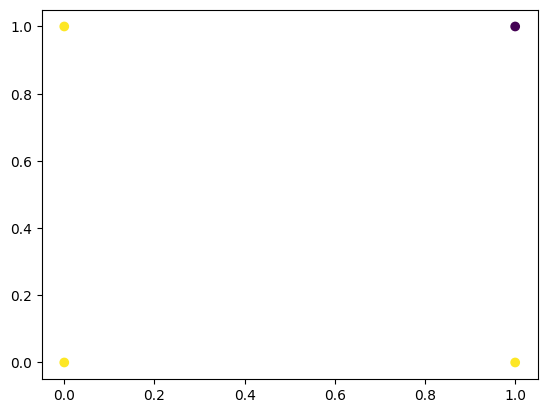

In [24]:
# NAND : AND의 역산(Not AND)

X=np.array([(0,0),(0,1),(1,0),(1,1)])
y=np.array([1,1,1,0])  

plt.scatter(X[:, 0], X[:, 1], c=y)

0.7
(0, 0) -> [1]
0.19999999999999996
(1, 0) -> [1, 1]
0.19999999999999996
(0, 1) -> [1, 1, 1]
-0.30000000000000004
(1, 1) -> [1, 1, 1, 0]


Text(0, 0.5, 'class 1')

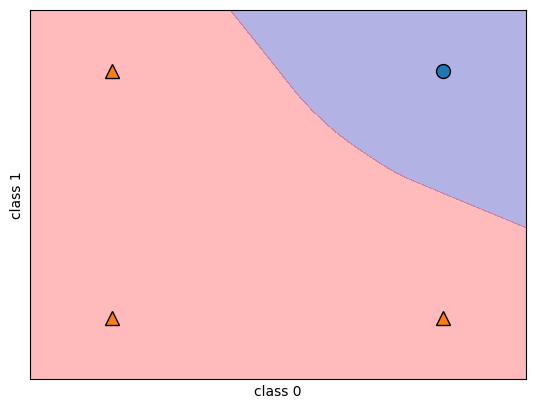

In [25]:
def NAND(x1, x2):

    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) #and와 부호가 다름
    b = 0.7 #and와 부호가 다름

    tmp = np.sum(w*x) + b
    print(tmp)
    
    if tmp <= 0:
        return 0
    else:
        return 1

y = []

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y.append(NAND(xs[0], xs[1]))
    print(str(xs) + " -> " + str(y))

#######################################################

model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("class 0")  
plt.ylabel("class 1")

### OR

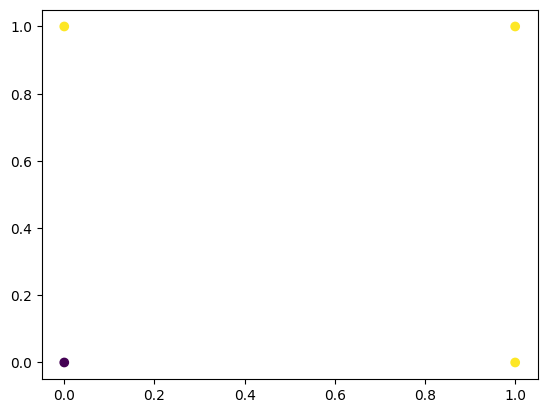

In [26]:
# OR

X=np.array([(0,0),(0,1),(1,0),(1,1)])
y=np.array([0,1,1,1])  

plt.scatter(X[:, 0], X[:, 1], c=y)

-0.2
(0, 0) -> [0]
0.3
(1, 0) -> [0, 1]
0.3
(0, 1) -> [0, 1, 1]
0.8
(1, 1) -> [0, 1, 1, 1]


Text(0, 0.5, 'class 1')

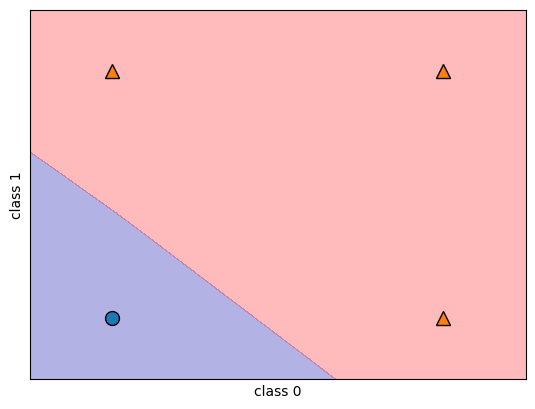

In [27]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2 #and와 값이 다름

    tmp = np.sum(w*x) + b
    print(tmp)

    if tmp <= 0:
        return 0

    else:
        return 1
    
y = []

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y.append(OR(xs[0], xs[1]))
    print(str(xs) + " -> " + str(y))

#######################################################

model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)  

mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)  
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)  

plt.xlabel("class 0")  
plt.ylabel("class 1")

### XOR

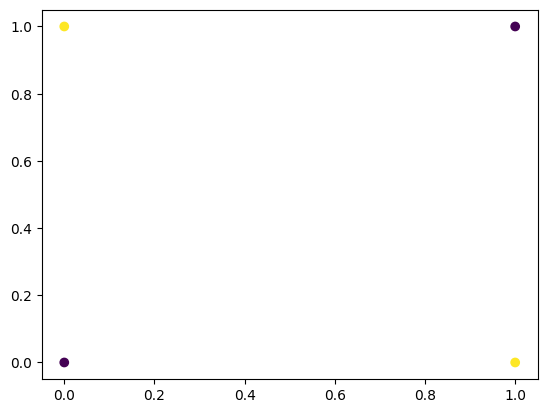

In [28]:
#단층퍼셉트론의 한계 : xor를 풀 수는 없다. 하지만 게이트를 조합하면 가능하다.

X=np.array([(0,0),(0,1),(1,0),(1,1)])
y=np.array([0,1,1,0])  

plt.scatter(X[:, 0], X[:, 1], c=y)

0.7
-0.2
-0.19999999999999996
(0, 0) -> [0]
0.19999999999999996
0.3
0.30000000000000004
(1, 0) -> [0, 1]
0.19999999999999996
0.3
0.30000000000000004
(0, 1) -> [0, 1, 1]
-0.30000000000000004
0.8
-0.19999999999999996
(1, 1) -> [0, 1, 1, 0]


Text(0, 0.5, 'class 1')

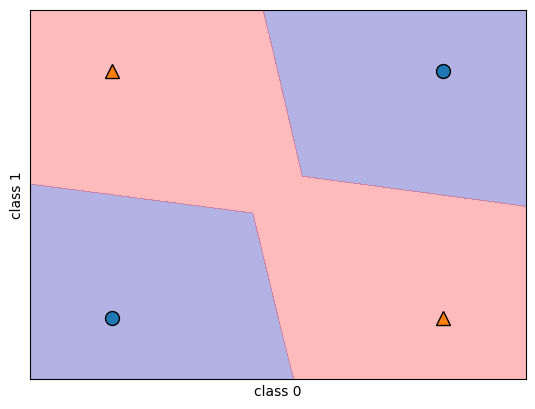

In [29]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

y = []

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y.append(XOR(xs[0], xs[1]))
    print(str(xs) + " -> " + str(y))

#######################################################

model = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)  

mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=.3)  
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("class 0")  
plt.ylabel("class 1")

# 3. 활성화 함수

* linear 회귀분석
* 시그모이드 : 이진분류의 마지막 활성화 함수
* ReLu : 은닉층의 활성화 함수
* 소프트맥스 : 다중분류의 마지막 활성화 함수

### ① 계단함수

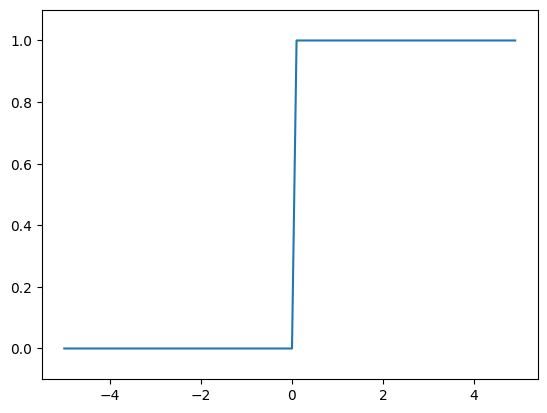

In [30]:
#계단함수(0보다 크면 1, 작으면 0)

import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int32)

X = np.arange(-5.0, 5.0, 0.1)
y = step_function(X)

plt.plot(X, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

### ② 시그모이드 함수

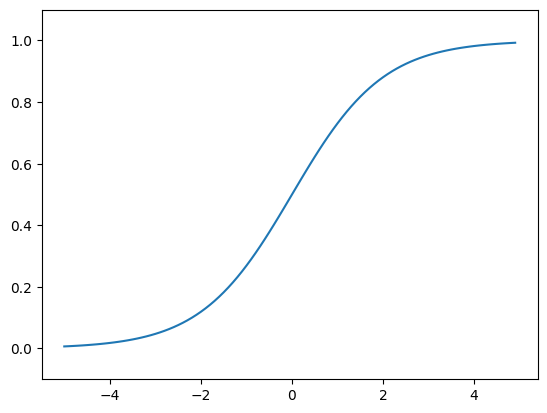

In [31]:
#시그모이드 함수 : S자 모양의 함수

import numpy as np
import matplotlib.pylab as plt

#np.exp() y=e의 x승

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)

plt.plot(X, y)
plt.ylim(-0.1, 1.1)
plt.show()

#0,1이 아닌 연속적인 실수값을 출력함

### ③ ReLU 함수(Rectified Linear Unit)

sigmoid 에서는 값이 클수록 기울기 소실 문제 발생 보완하기 위해 나옴

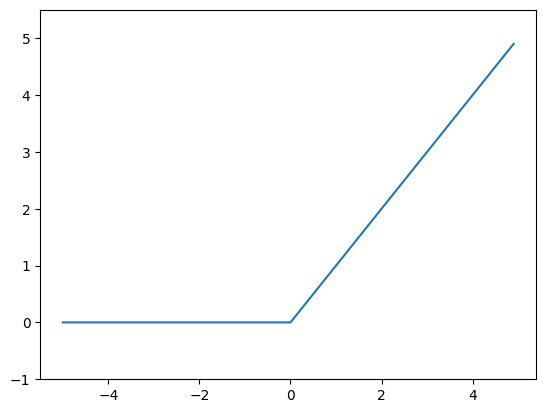

In [32]:
# 입력이 0보다 크면 그대로 출력, 0 이하이면 0을 출력

import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

### leaky_relu (음수), gelu (0일떄)

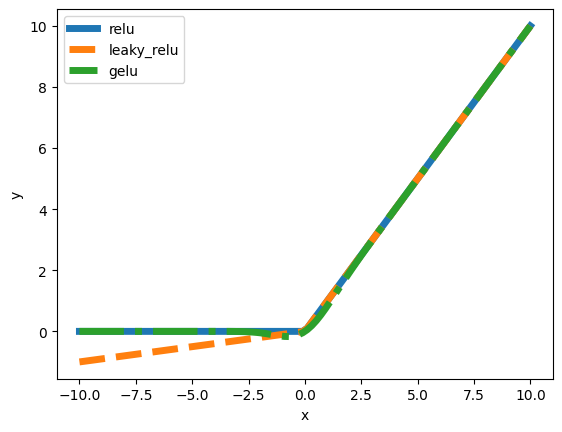

In [42]:
import math
import numpy as np 

def relu(x):
    values=[]
    for i in x:
        if i > 0:
            values.append(i)
        else:
            values.append(0)          
    return values 
    
def leaky_relu(x, g):
    values=[]
    for i in x:
        if i > 0:
            values.append(i)
        else:
            values.append(g * i)    
    return values 

def gelu(x):
    return [0.5 * z * (1 + math.tanh(math.sqrt(2 / np.pi) * (z + 0.044715 * math.pow(z, 3)))) for z in x]

x=np.linspace(-10,10,100)

import matplotlib.pyplot as plt 

# plt.figure(figsize=(10,6))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,relu(x),label='relu',ls='-',lw='5')
plt.plot(x,leaky_relu(x,0.1),label='leaky_relu',ls='--',lw='5')
plt.plot(x,gelu(x),label='gelu',ls='-.',lw='5')
plt.legend(labels=['relu','leaky_relu','gelu'])
plt.show()

### ④ tanh 함수

[-3.14159265 -2.57039399 -1.99919533 -1.42799666 -0.856798   -0.28559933
  0.28559933  0.856798    1.42799666  1.99919533  2.57039399  3.14159265]
[-0.99627208 -0.98836197 -0.96397069 -0.89125532 -0.69460424 -0.27807943
  0.27807943  0.69460424  0.89125532  0.96397069  0.98836197  0.99627208]


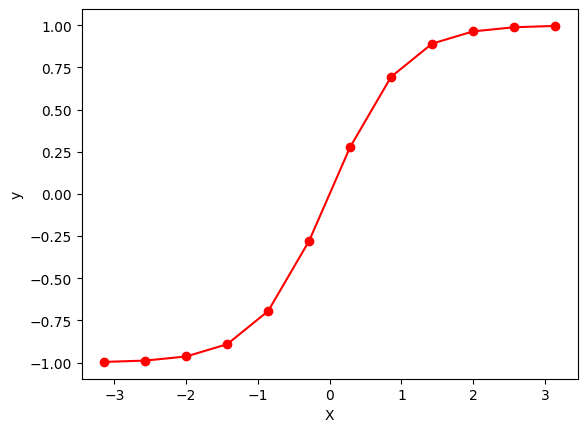

In [33]:
# Hyperbolic Tangent(tanh)
# 확장된 시그모이드 함수
# 시그모이드는 0~1 사이 출력
# tanh는 -1 ~ 1
# 시그모이드보다 출력범위가 더 넓고 경사면이 더 가파르기 때문에
# 더 빠르게 수렴하여 학습이 이루어질 수 있음

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 12) # 구간 시작점, 구간 끝점, 구간 내 숫자 개수
y = np.tanh(X)

print(X)
print(y)

plt.plot(X, y, c = 'r', marker = "o")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

* 회귀 - 지도학습
* 분류 - 지도학습
* 클러스터링 - 비지도학습

* 지도학습
* 비지도학습
* 강화학습 (패널티를 부여)

[-3.14159265 -2.57039399 -1.99919533 -1.42799666 -0.856798   -0.28559933
  0.28559933  0.856798    1.42799666  1.99919533  2.57039399  3.14159265]
[-0.99627208 -0.98836197 -0.96397069 -0.89125532 -0.69460424 -0.27807943
  0.27807943  0.69460424  0.89125532  0.96397069  0.98836197  0.99627208]


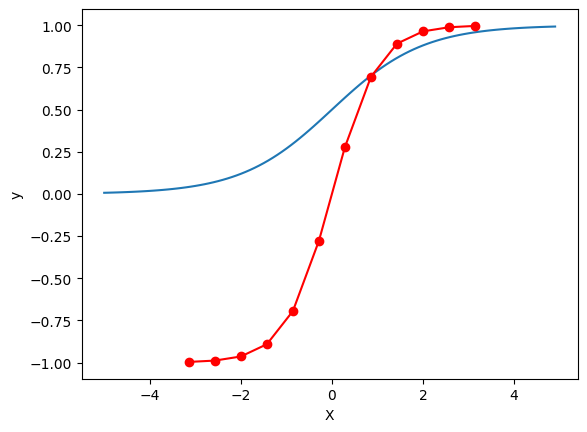

In [39]:
#시그모이드 함수 : S자 모양의 함수

import numpy as np
import matplotlib.pylab as plt

#np.exp() y=e의 x승

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)

plt.plot(X, y)
# plt.ylim(-0.1, 1.1)
# plt.show()

# Hyperbolic Tangent(tanh)
# 확장된 시그모이드 함수
# 시그모이드는 0~1 사이 출력
# tanh는 -1 ~ 1
# 시그모이드보다 출력범위가 더 넓고 경사면이 더 가파르기 때문에
# 더 빠르게 수렴하여 학습이 이루어질 수 있음

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 12)
y = np.tanh(X)

print(X)
print(y)

plt.plot(X, y, c = 'r', marker = "o")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
#0,1이 아닌 연속적인 실수값을 출력함

### ⑤ 행렬의 곱셈

In [34]:
#행렬의 곱셈

a=np.array([[1,2],[3,4]])

print(a.shape)
print(a)

b=np.array([[5,6],[7,8]])

print(b.shape)
print(b)
print(np.dot(a,b))

#######################################################

#행렬의 곱셈

a=np.array([[1,2,3],[4,5,6]])

print(a.shape)
print(a)

b=np.array([[1,2],[3,4],[5,6]])

print(b.shape)
print(b)
print(np.dot(a,b))

#######################################################

a=np.array([[1,2,3],[4,5,6]])
c=np.array([[1,2],[3,4]])

np.dot(a,c)

# 2행 3열 x 2행 2열 에러

#앞행렬의 열과 뒤 행렬의 행이 같아야 한다.

(2, 2)
[[1 2]
 [3 4]]
(2, 2)
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]
(2, 3)
[[1 2 3]
 [4 5 6]]
(3, 2)
[[1 2]
 [3 4]
 [5 6]]
[[22 28]
 [49 64]]


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

### ⑥ 항등함수

In [43]:
#신경망의 연산에는 행렬을 사용함

x=np.array([1, 0.5]) #입력값

#첫번째 은닉층

w1=np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #가중치
b1=np.array([0.1, 0.2, 0.3]) #편향

a1=np.dot(x,w1)+b1 #첫번째 은닉층의 합계값
z1=sigmoid(a1)  #활성화함수

print(a1)
print(z1)

#두번째 은닉층의 작업

w2=np.array([[0.1, 0.4], [0.2, 0.5],[0.3, 0.6]]) #가중치
b2=np.array([0.1, 0.2]) #편향
a2=np.dot(z1,w2)+b2 #두번째 은닉층의 합계값

z2=sigmoid(a2)  #활성화함수

print(a2)
print(z2)

#항등함수: 항상 성립하는 등식,집합 X의 원소와 이에 대응하는 집합 Y의 원소가 항상 같음

def identity_function(x): #항등함수
    return x

w3=np.array([[0.1, 0.3], [0.2, 0.4]])
b3=np.array([0.1, 0.2])
a3=np.dot(z2,w3)+b3

y=identity_function(a3) #출력층의 활성화함수로 항등함수를 사용
print(y)

#######################################################

#출력층의 활성화함수
#회귀:항등함수
#분류:소프트맥스

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]


### ⑦ 소프트맥스 함수

소프트맥스 함수 : n 출력층 노드수 분자 : 입력신호의 지수함수, 분모 : 모든 입력 신호의 지수 함수의 합

In [46]:
a=np.array([0.3,2.9,4.0])

exp_a=np.exp(a) #지수함수
print(exp_a)

sum_exp_a=np.sum(exp_a) #지수함수의 합계
print(sum_exp_a)

y=exp_a / sum_exp_a
print(y)

def softmax(a):
    exp_a=np.exp(a) #지수함수
    #print(exp_a)
    sum_exp_a=np.sum(exp_a) #지수함수의 합계
    #print(sum_exp_a)
    y=exp_a / sum_exp_a
    return y

a=np.array([0.3,2.9,4.0])
print(softmax(a))

#무한대 문제가 발생함
a=np.array([1000,1100,1200])
print(softmax(a))

# 큰 값을 입력하면 지수계산 문제로 무한대가 나오게 되어 오류가 발생함
a=np.array([1010,1000,900])
print(np.exp(a) / np.sum(np.exp(a)))

#a의 최대값
c=np.max(a)

#a에서 최대값을 뺀 값
print(a-c)

#무한대 문제가 해결됨
print(np.exp(a-c) / np.sum(np.exp(a-c)))

#######################################################

import numpy as np

#무한대 문제를 해결한 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a=np.exp(a-c) #지수함수
    #print(exp_a)
    sum_exp_a=np.sum(exp_a) #지수함수의 합계
    #print(sum_exp_a)
    y=exp_a / sum_exp_a
    return y

a=np.array([0.3,2.9,4.0])
print(softmax(a))

#무한대 문제가 해결됨
a=np.array([1000,1100,1200])
print(softmax(a))  

#######################################################

#소프트맥스 함수의 총합은 1
np.sum(softmax(a))
#######################################################
print(softmax(a))

#소프트맥스 함수 출력의 총합은 1이 됨
#따라서 소프트맥스 함수의 출력결과를 확률로 해석할 수 있음
s=np.sum(softmax(a))
print(s)

#확률이 가장 높은 값의 인덱스
idx=np.argmax(softmax(a))
print(idx)

#확률이 가장 높은 값
print(a[idx])



[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
[0.01821127 0.24519181 0.73659691]
[nan nan nan]
[nan nan nan]
[   0  -10 -110]
[9.99954602e-01 4.53978687e-05 1.68883521e-48]
[0.01821127 0.24519181 0.73659691]
[1.38389653e-87 3.72007598e-44 1.00000000e+00]
[1.38389653e-87 3.72007598e-44 1.00000000e+00]
1.0
2
1200


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12464\466963274.py:13: RuntimeWarning: overflow encountered in exp
  exp_a=np.exp(a) #지수함수
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12464\466963274.py:17: RuntimeWarning: invalid value encountered in divide
  y=exp_a / sum_exp_a
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12464\466963274.py:29: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12464\466963274.py:29: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a) / np.sum(np.exp(a)))


# 4. 손실함수

* 손실함수 : 오차를 측정하는 함수
* mse                         평균제곱오차
* categorical cross entropy   다분류
* binary cross entropy        이진분류

### ① 평균제곱오차

In [48]:
import numpy as np

#평균제곱 오차 : (출력값 - 정답)의 제곱의 합계를 데이터의 개수로 나눈 값
#여기서는 two class인 경우라고 가정하여 0.5를 곱함
#실제로는 class의 개수가 n개 일때 1/n을 곱해야 함

def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

#인덱스 2가 정답
t=np.array([0,0,1,0,0,0,0,0,0,0])

#인덱스 2를 정답으로 계산
y=np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
print(mean_squared_error(y,t))

#인덱스 7을 정답으로 계산
y=np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(mean_squared_error(y,t))

0.09750000000000003
0.5975


### ② 크로스엔트로피 오차

mse는 제곱해서 평균을 내야해 연산이 많은것을 보완하기 위해 나옴

In [ ]:
# 엔트로피 : 정보를 최적으로 인코딩하기 위해 필요한 비트수
#      오늘이 무슨 요일인지 bit로 표현하려면? 3비트 필요
#          월  화  수  목   금  토  일
#         000 001 010 011 100 101 110

# 교차엔트로피 오차(cross entropy error)
# yk : 신경망의 출력
# tk : 정답 레이블

# 정답레이블이 2이고 신경망의 출력결과가 0.6이라면
# 교차엔트로피오차는 -log0.6=0.51이 된다.
# 신경망 출력이 0.1이라면
# -log0.1=2.30이 된다.
# 정답일 때의 출력으로 전체 값이 결정됨

# 0일때는 곱하기가 0이 되기 때문에 연산속도가 빨라짐
# 따라서 평균제곱오차보다 교차엔트로피 오차를 더 많이 사용하게 된다.

def cross_entropy_error(y,t): # y예측값, t실제값
    delta=1e-7 #값이 무한대가 되거나 0이 되지 않도록 빼주는 값
    return -np.sum(t * np.log(y+delta))

t=np.array([0,0,1,0,0,0,0,0,0,0])
y=np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

cross_entropy_error(y,t)

# 6. 오존량 예측

In [1]:
import pandas as pd
df = pd.read_csv('./data/ozone2.csv')
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


<Axes: xlabel='Result', ylabel='count'>

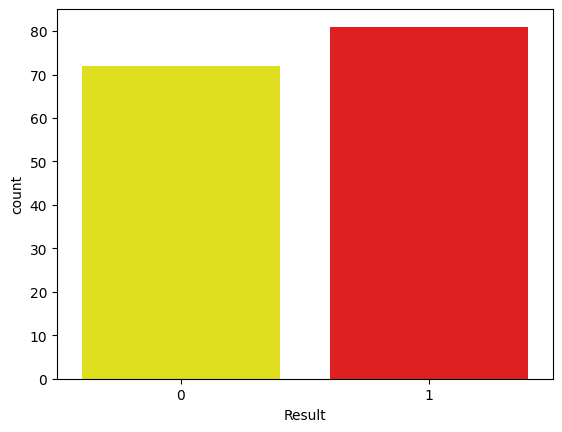

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["yellow", "red"]
sns.countplot(x='Result', palette=colors, data=df)

#불균형 데이터셋

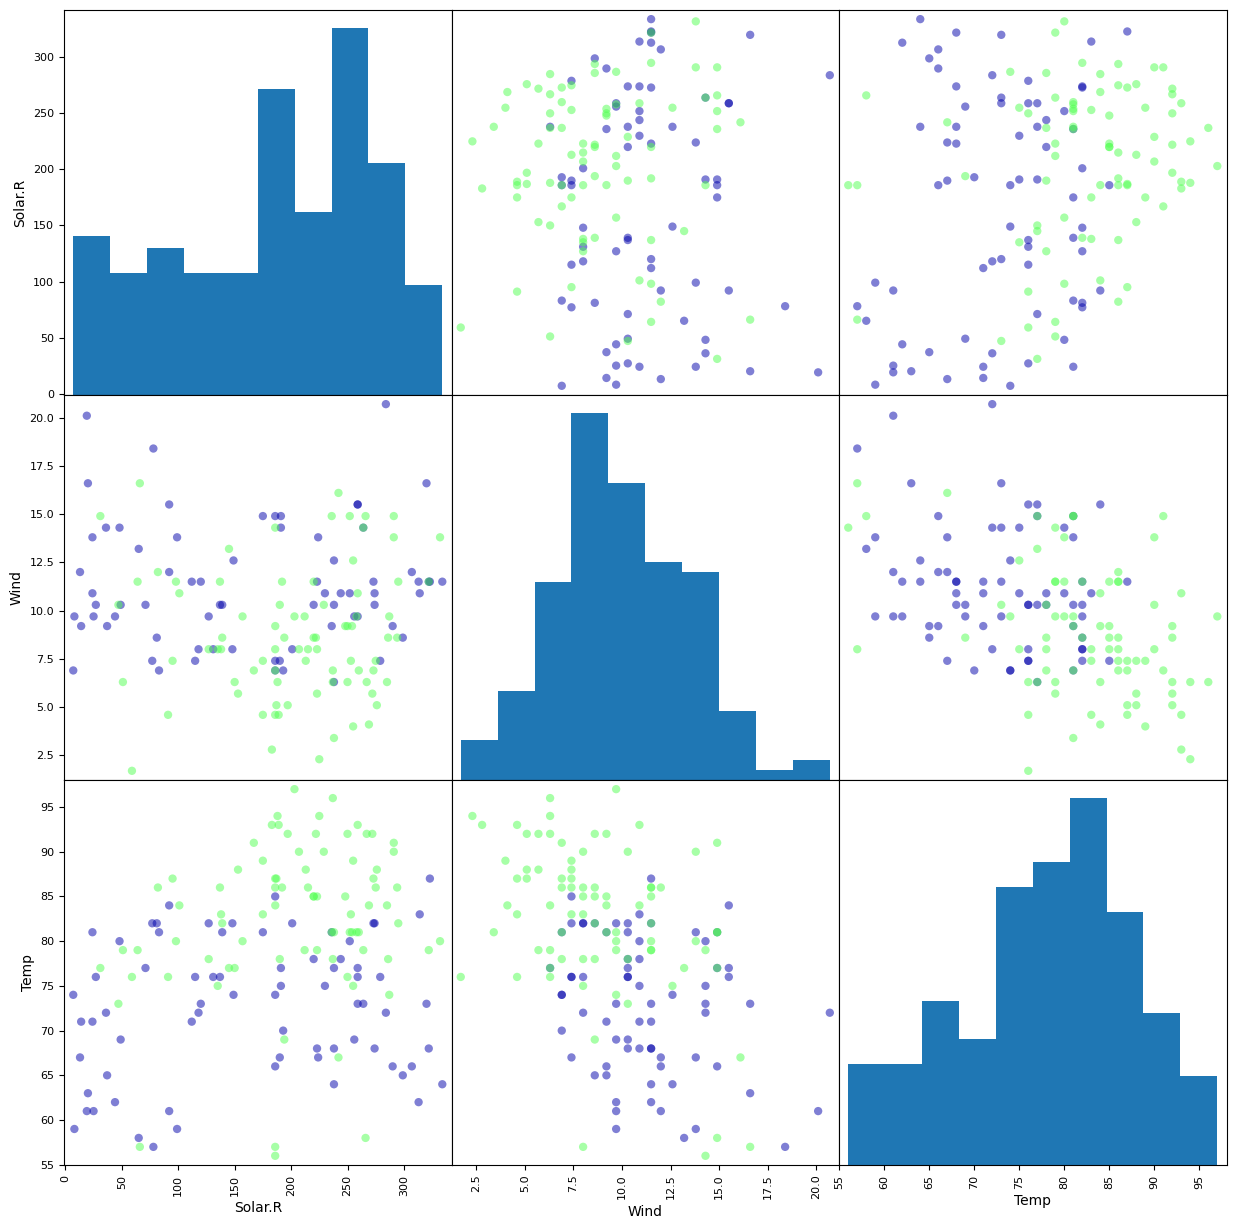

In [3]:
cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]
y = df['Result']

import mglearn
import matplotlib.pyplot as plt

#산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15),marker='o', cmap=mglearn.cm3)
plt.show()

In [4]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

학습용: 0.7043478260869566
검증용: 0.8275862068965517
검증용: 0.8275862068965517


c:\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


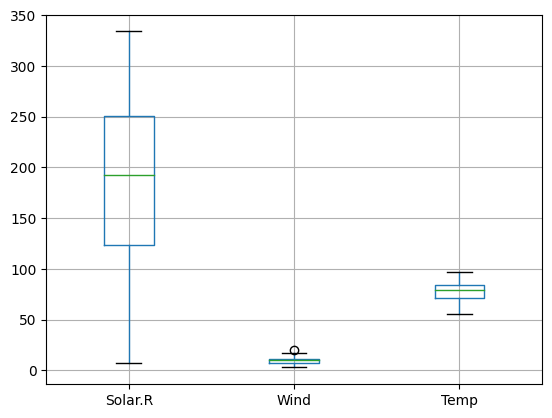

In [5]:
X = X_samp[cols]
y = y_samp['Result']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)

import numpy as np

pred=model.predict(X_test)

print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))
print("검증용:",np.mean(pred == y_test))

X_train.boxplot()
plt.show()

* scaler 정규화
* 0~1 정규화 MinMaxScaler
* 평균0, 표준편차1 StandardScaler (일반적으로 사용)


특성별 최소값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
특성별 최대값
Solar.R    1.0
Wind       1.0
Temp       1.0
dtype: float64


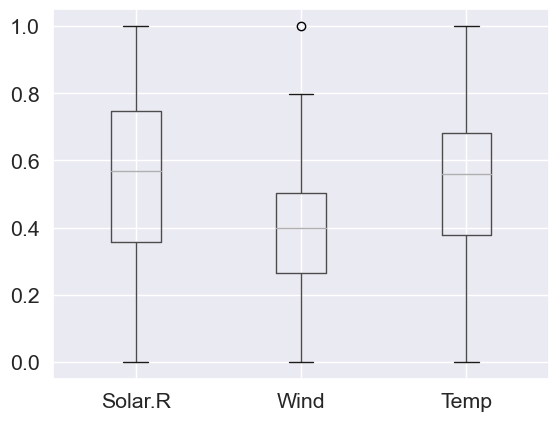

In [14]:
# Normalization 정규화, 모든 변수의 값이 0~1 사이의 값을 갖도록 조정
# 인공신경망,딥러닝에서 자주 사용
# 변수의 범위를 왜곡하지 않음
# (특정값-최소값)/(최대값-최소값)
# 특정 데이터가 가지는 위치를 보고 싶을 때
# (예) 전체 고객 중 체중이 가장 작은 사람이 40Kg, 가장 큰 사람이 120Kg 일 때
# 40Kg  0으로 변환
# 120Kg 1로 변환
# 80Kg  (80-40)/(120-40) = 40/80 = 0.5로 변환

# 학습용 데이터셋에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)

# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨
X_train_scaled = (X_train - min_on_training) / range_on_training

# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))

X_train_scaled.boxplot()
plt.show()

In [15]:
model = MLPClassifier(random_state=0)

model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

학습용: 0.7391304347826086
검증용: 0.7931034482758621


c:\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


            Solar.R          Wind          Temp
count  1.150000e+02  1.150000e+02  1.150000e+02
mean   9.847196e-17  4.981522e-16  6.217249e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.017401e+00 -2.122033e+00 -2.361740e+00
25%   -6.728957e-01 -7.450022e-01 -6.669730e-01
50%    1.291912e-01 -5.648689e-02  1.530758e-01
75%    7.985587e-01  4.823512e-01  6.997749e-01
max    1.756447e+00  3.056800e+00  2.121193e+00
         Solar.R       Wind       Temp
count  29.000000  29.000000  29.000000
mean    0.146647   0.217061  -0.005278
std     1.076194   1.191784   1.108749
min    -1.809666  -2.451323  -2.252401
25%    -0.770993  -0.565390  -0.502963
50%     0.290763   0.123126   0.043736
75%     0.890885   0.811641   0.699775
max     1.733365   3.236412   1.683833


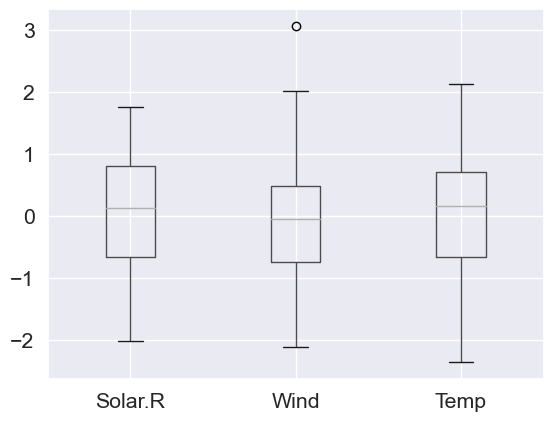

In [16]:
#Standardization 표준화, 평균 0, 표준편차 1
# 데이터를 0을 중심으로 양쪽으로 분포시키는 방법
# 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값
# (측정값-평균) / 표준편차
# k-means, svm 등 거리 기반의 모델에서 주로 사용함
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다
# 1000원과 1달러(가중치가 1000배가 되지 않도록 해야 함)

# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)

# 값에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train

# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

print(X_train_scaled.describe())
print(X_test_scaled.describe())

X_train_scaled.boxplot()
plt.show()

In [17]:
#표준화된 데이터로 다시 학습

model = MLPClassifier(random_state=0)

model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

#정확도가 높아짐

학습용: 0.7652173913043478
검증용: 0.7241379310344828


c:\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, pred)
cm

array([[12,  2],
       [ 3, 12]], dtype=int64)

In [19]:
df_cm=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,12,2
1,3,12


<Axes: title={'center': 'Confusion Matrix'}>

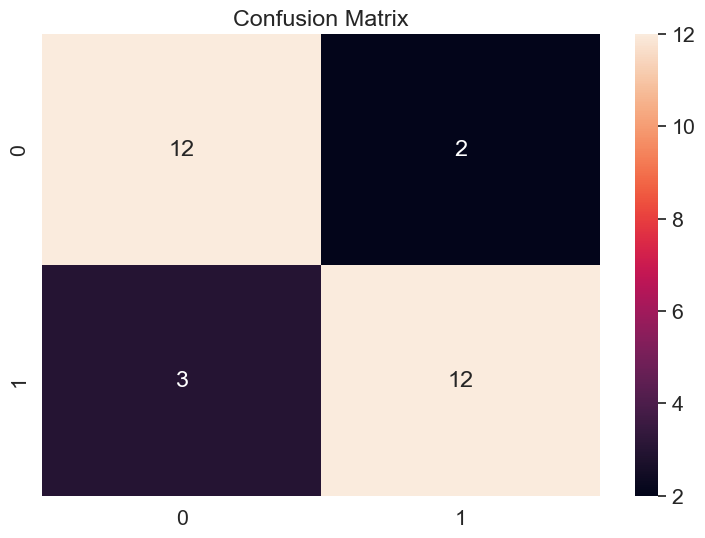

In [20]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

# 7. 대용량 데이터 학습

* 대용량 데이터를 기계학습에 사용할 경우 메모리 부족 문제가 발생할 수 있음
* 서버 용량 증설
* 학습용 데이터를 적게 설정
* 분산 처리 시스템(hadoop, spark)

In [22]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 데이터를 섞고
idx = np.arange(X.shape[0])

np.random.seed(0)
np.random.shuffle(idx)

X = X[idx]
y = y[idx]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)  
X = scaler.transform(X)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

params = {
    'hidden_layer_sizes': [(10,), (50,), (100,),
                           (10,10), (50,50), (100,100)],
    'activation': ['tanh', 'relu'], # 활성화 함수
    'alpha': [0.0001, 0.01], # 학습량(학습률)  조절
}

model = MLPClassifier(random_state=0, max_iter=5000) # max_iter 최대 반복 횟수
clf = GridSearchCV(model, param_grid=params, cv=3) # 3중 for문 간단하게 교차검증 3번
clf.fit(X, y)

print(clf.best_score_) # 최고 점수
print(clf.best_params_) # 최적의 파라미터
print(clf.best_estimator_) # 최적의 모형

# 데이터 수가 적을때는 교차검증을 하는것이 좋음

0.9733333333333333
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=5000,
              random_state=0)


In [24]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)  

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# generator
# 메모리는 절약할 수 있지만 실행시간이 더 오래 걸릴 수 있음

def make_numbers(n):
    while n < 6:
        yield n # 메모리에 저장하지 않고 호출한 곳으로 값을 보냄(return과 비슷한 역할)
        n += 1

for i in make_numbers(0):
    print(i)        

0
1
2
3
4
5


In [26]:
import sys

#리스트의 데이터가 늘어나면 메모리 사용량이 증가한다.    
#리스트의 모든 데이터를 메모리에 적재

a = [i for i in range(100)]
print(sys.getsizeof(a))

b = [i for i in range(1000)]
print(sys.getsizeof(b))

#generator expression : 위에서 언급한 generator 함수를 좀더 쉽게 사용할 수 있도록 제공되는 표현식
#[] 대신 ()을 사용하면 메모리를 효율적으로 사용할 수 있음
#모든 데이터를 메모리에 적재하지 않고 next() 함수를 통해 조금씩 메모리에 적재

c = (i for i in range(100))
print(sys.getsizeof(c))

d = (i for i in range(1000))
print(sys.getsizeof(d))

920
8856
112
112


In [29]:
import time

def func_sleep(x):
    print('1초 멈춤...')
    time.sleep(1)
    return x

# 리스트
items1 = [func_sleep(x) for x in range(5)]

# generator 생성
items2 = (func_sleep(y) for y in range(5))

1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...


In [30]:
%%time

#리스트를 사용하면 리스트의 모든 원소를 한꺼번에 처리한 후 최종 결과가 출력됨    
for i in items1:
    print(i)

0
1
2
3
4
CPU times: total: 0 ns
Wall time: 0 ns


In [31]:
%%time

#generator를 사용하면 수행 시간이 긴 연산을 한꺼번에 수행하지 않고 조금씩 수행함  
for i in items2:
    print(i)
    
print('메모리 사용량:',sys.getsizeof(items1))
print('메모리 사용량:',sys.getsizeof(items2))

1초 멈춤...
0
1초 멈춤...
1
1초 멈춤...
2
1초 멈춤...
3
1초 멈춤...
4
메모리 사용량: 120
메모리 사용량: 112
CPU times: total: 15.6 ms
Wall time: 5.05 s


In [35]:
#일반적인 방식(한꺼번에 처리하는 방식)
from sklearn.metrics import accuracy_score

clf=MLPClassifier(max_iter=5000, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

In [33]:
#batch(X_train, y_train, 10)

#전체 데이터를 보내지 않고 10개씩 조금씩 보내서 처리하는 방식

def batch(X1, y1, n):
    x_size=len(X1)
    for idx in range(0, x_size, n):
        yield X1[idx:min(idx + n, x_size)], y1[idx:min(idx + n, x_size)]
        
#10개씩 12회로 나누어 처리하는 방식
clf2 = MLPClassifier(random_state=0)

#시간은 더 오래 걸릴 수 있으나 메모리를 절약할 수 있는 방법
points_tr=[]
points_te=[]

samp = batch(X_train, y_train, 10) # 미니배치 10세트

for idx, (chunk_X, chunk_y) in enumerate(samp): # 인덱스, 데이터
    print(idx)

    #부분적으로 학습, 처음에는 정확도가 낮지만 점차 향상됨
    clf2.partial_fit(chunk_X, chunk_y, classes=[0, 1, 2]) # 부분학습 / 학습된 것 누적 
    
    pred = clf2.predict(X_train)
    point=accuracy_score(y_train, pred)
    points_tr.append(point)
    print('학습용:',point)

    pred = clf2.predict(X_test)
    point=accuracy_score(y_test, pred)
    points_te.append(point)
    print('검증용:',point)

0
학습용: 0.48333333333333334
검증용: 0.5
1
학습용: 0.525
검증용: 0.5333333333333333
2
학습용: 0.6416666666666667
검증용: 0.6333333333333333
3
학습용: 0.725
검증용: 0.7
4
학습용: 0.7833333333333333
검증용: 0.7333333333333333
5
학습용: 0.825
검증용: 0.7666666666666667
6
학습용: 0.8416666666666667
검증용: 0.7666666666666667
7
학습용: 0.8333333333333334
검증용: 0.8
8
학습용: 0.85
검증용: 0.8
9
학습용: 0.8583333333333333
검증용: 0.8
10
학습용: 0.8583333333333333
검증용: 0.8
11
학습용: 0.8583333333333333
검증용: 0.8


* batch       배치(일괄처리)
* mini_batch  미니배치 - 일반적인 방식
* online      1건씩 처리

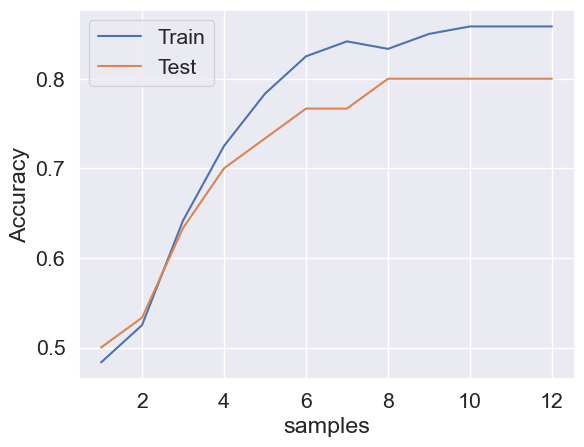

In [34]:
import matplotlib.pyplot as plt

plt.rcParams["font.size"]=15
plt.plot(range(1,13), points_tr, label="Train")
plt.plot(range(1,13), points_te, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("samples")
plt.legend()

# 8. 와인품질 분류

In [3]:
import pandas as pd

df = pd.read_csv("./data/wine/wine_new.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [4]:
df["class"].value_counts()

class
1    855
0    744
Name: count, dtype: int64

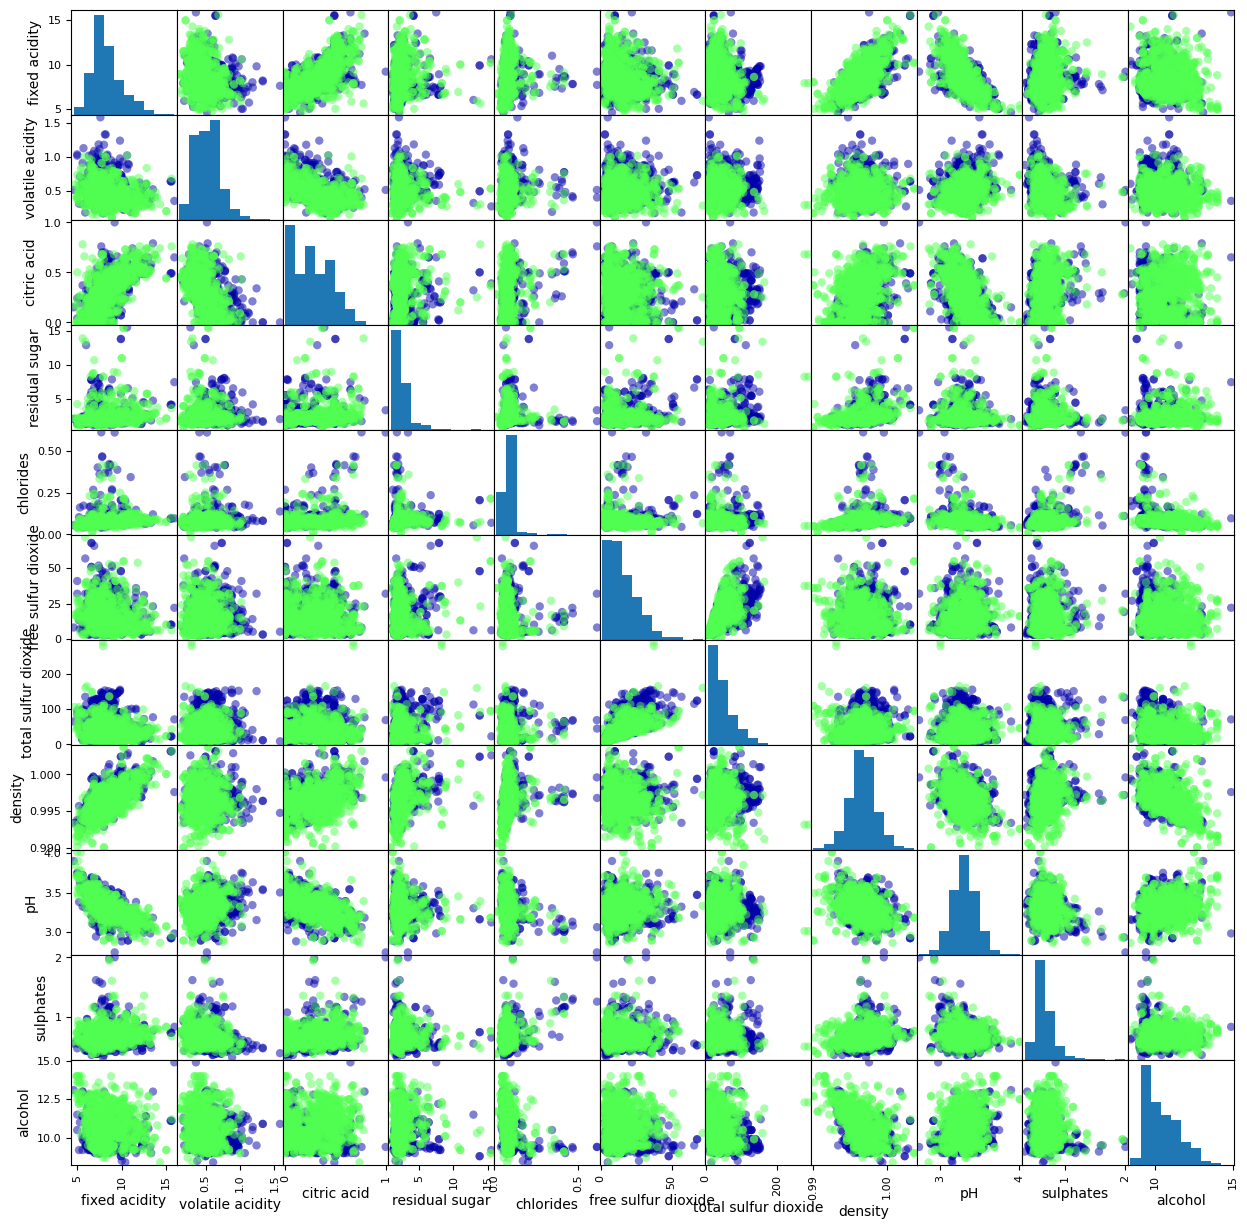

In [5]:
train_cols = df.columns[0:11]  #0~10 필드

X = df[train_cols] # 독립변수
y = df["class"]

import mglearn
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(X,c=y,figsize=(15,15),marker='o',cmap=mglearn.cm3)
plt.show()

In [7]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])

df2=pd.concat([X_samp,y_samp],axis=1)
df2["class"].value_counts()

class
0    744
1    744
Name: count, dtype: int64

In [8]:
X = X_samp[train_cols] # 독립변수
y = y_samp["class"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)

import numpy as np
pred=model.predict(X_test)

print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))
print("검증용:",np.mean(pred == y_test))
y_train.value_counts()

학습용: 0.7445378151260504
검증용: 0.7449664429530202
검증용: 0.7449664429530202


class
0    597
1    593
Name: count, dtype: int64

In [7]:
# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)

# 값에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train

# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [8]:
#표준화된 데이터로 다시 훈련
model = MLPClassifier(random_state=0)
model.fit(X_train_scaled, y_train)
#최대 반복 횟수에 도달했다는 경고  : max_iter 반복횟수를 늘려야 함

print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#예측률이 향상됨

학습용: 0.8134453781512605
검증용: 0.7986577181208053


c:\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
# 최대 반복 횟수 max_iter를 늘림

model = MLPClassifier(max_iter=1000,random_state=42)
model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#예측률이 향상됨

학습용: 0.9327731092436975
검증용: 0.825503355704698


c:\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# 은닉층을 2개로 늘림

model = MLPClassifier(max_iter=1000,hidden_layer_sizes=[100,100],random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

#예측률이 향상됨

학습용: 0.9991596638655462
검증용: 0.8187919463087249


In [11]:
# 은닉층을 3개로 늘림

model = MLPClassifier(max_iter=1000,hidden_layer_sizes=[100,100,100],random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

#더이상 개선되지 않음

학습용: 1.0
검증용: 0.7919463087248322


In [12]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
confusion_matrix(y_test, pred)

#           예측값
# 실제값    1   0
#   1      TP  FN
#   0      FP  TN

array([[117,  30],
       [ 32, 119]], dtype=int64)

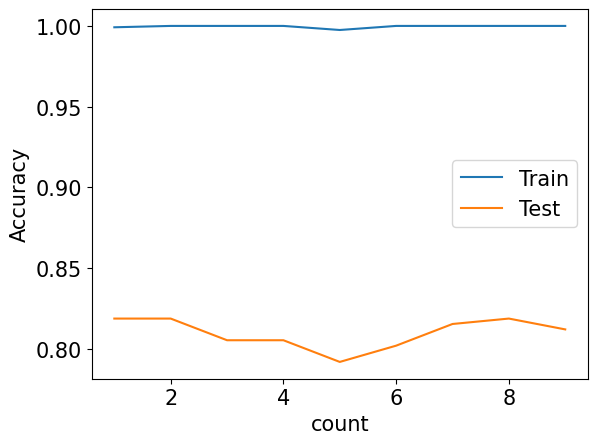

In [13]:
# 최적의 은닉노드 개수를 구하기 위한 실험

import numpy as np
import matplotlib.pyplot as plt

train_rate=[]
test_rate=[]

for i in range(100,301,100): # 첫번째 은닉층의 노드수 100~300
    for j in range(100,301,100): #두번째 은닉층의 노드수 100~300
        model=MLPClassifier(random_state=0,
            hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(X_train_scaled,y_train)
        train_rate.append(model.score(X_train_scaled,y_train))
        test_rate.append(model.score(X_test_scaled,y_test))        

plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

In [14]:
max_rate=max(test_rate) #최대값
idx=np.where(test_rate == max_rate)[0][0] #최대값의 인덱스값

print('idx:',idx)
print('최고정확도:',max_rate)        

cnt=0

for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
        cnt+=1

idx: 0
최고정확도: 0.8187919463087249
100 100


In [15]:
#실험을 통해 구한 최적의 은닉노드수로 만든 모형

model=MLPClassifier(hidden_layer_sizes=[300,100],random_state=0)
model.fit(X_train_scaled,y_train)

print(f'학습용:{model.score(X_train_scaled,y_train)*100:6.2f}%')
print(f'검증용:{model.score(X_test_scaled,y_test)*100:6.2f}%')

학습용: 99.58%
검증용: 84.23%


c:\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
